# Описание датасета

**1. Операция (surgery?)**

- **1** — операция проводилась
- **2** — лечение без операции

---

**2. Возраст (Age)**

- **1** — взрослая лошадь
- **2** — жеребёнок (моложе 6 месяцев)

---

**4. Ректальная температура (rectal temperature)**

- Непрерывная величина, измеряется в градусах Цельсия
- Повышенная температура может указывать на инфекцию
- Пониженная температура наблюдается на поздних стадиях шока
- Нормой считается около 37.8 °C
- Температура изменяется в зависимости от стадии заболевания:
Например, она может быть сначала в пределах нормы, затем повышаться при развитии патологий и снова снижаться при наступлении шока

---

**5. Пульс (pulse)**

- Непрерывная величина, измеряется в ударах в минуту
- Отражает сердечную активность
- Нормальное значение для взрослых лошадей: 30–40 уд/мин
- Ниже нормы — редкость (возможна у спортивных лошадей: 20–25)
- Повышенный пульс характерен для боли и/или нарушений кровообращения (шока)

---

**6. Частота дыхания (respiratory rate)**

- Непрерывная величина
- Нормальный диапазон: 8–10 вдохов в минуту
- Значения сильно варьируются и могут быть малоинформативными

---

**7. Температура конечностей (temperature of extremities)**

- Субъективная оценка периферического кровообращения
- Варианты значений:
    - **1** — нормальная
    - **2** — тёплая
    - **3** — прохладная
    - **4** — холодная
- Холодные конечности — возможный признак шока
- Тёплые конечности часто соответствуют повышенной ректальной температуре

---

**11. Уровень боли (pain) - субъективная шкала** 

- **1** — тревожна, боли нет
- **2** — апатия
- **3** — лёгкая периодическая боль
- **4** — выраженная периодическая боль
- **5** — сильная постоянная боль
- *Важно:* шкала **не является строго порядковой** — интерпретировать нужно с осторожностью
- Обычно при сильной боли возникает необходимость в хирургическом вмешательстве
- Предварительное обезболивание может искажать истинную оценку боли

---

**23. Исход заболевания (outcome)**

- Что произошло с лошадью по итогам лечения:
    - **1** — выжила
    - **2** — погибла
    - **3** — была подвергнута эвтаназии

# Подготовка данных.

Загрузка данных (заголовки отсутствуют), выбор нужных столбцов по индексу.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path= r'C:\Users\AAA\Desktop\horse_data.csv'
df= pd.read_csv(file_path, header=None, usecols=[0, 1, 3, 4, 5, 6, 10, 22])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       300 non-null    object
 1   1       300 non-null    int64 
 2   3       300 non-null    object
 3   4       300 non-null    object
 4   5       300 non-null    object
 5   6       300 non-null    object
 6   10      300 non-null    object
 7   22      300 non-null    object
dtypes: int64(1), object(7)
memory usage: 18.9+ KB


Присваиваем названия столбцам и преобразуем в нужные типы данных. Сразу увидел и исправил ошибку.

In [2]:
df.columns = ['surgery?', 'Age', 'rectal temperature', 'pulse', 'respiratory rate', 
              'temperature of extremities', 'pain', 'outcome']

df['surgery?'] = pd.to_numeric(df['surgery?'], errors='coerce').astype('float64')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype('float64')
df['rectal temperature'] = pd.to_numeric(df['rectal temperature'], errors='coerce').astype('float64')
df['pulse'] = pd.to_numeric(df['pulse'], errors='coerce').astype('float64')
df['respiratory rate'] = pd.to_numeric(df['respiratory rate'], errors='coerce').astype('float64')
df['temperature of extremities'] = pd.to_numeric(df['temperature of extremities'], errors='coerce').astype('float64')
df['pain'] = pd.to_numeric(df['pain'], errors='coerce').astype('float64')
df['outcome'] = pd.to_numeric(df['outcome'], errors='coerce').astype('float64')

# Заменяем все значения "9" (ошибка в исходнике) на "2" в столбце "Age"
df['Age'] = df['Age'].replace(9, 2)


df.head(20)

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1.0,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1.0,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1.0,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,2.0,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1.0,37.3,104.0,35.0,NaN,NaN,2.0
5,2.0,1.0,NaN,NaN,NaN,2.0,2.0,1.0
6,1.0,1.0,37.9,48.0,16.0,1.0,3.0,1.0
7,1.0,1.0,NaN,60.0,NaN,3.0,NaN,2.0
8,2.0,1.0,NaN,80.0,36.0,3.0,4.0,3.0
9,2.0,2.0,38.3,90.0,NaN,1.0,5.0,1.0


In [3]:
# Убидимся, что значения соответствуют описанию “horse_data.names”.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Уникальные значения в столбце '{column}':")
    print(unique_values)
    print()

Уникальные значения в столбце 'surgery?':
[ 2.  1. nan]

Уникальные значения в столбце 'Age':
[1. 2.]

Уникальные значения в столбце 'rectal temperature':
[38.5 39.2 38.3 39.1 37.3  nan 37.9 38.1 37.2 38.  38.2 37.6 37.5 39.4
 39.9 38.4 38.6 37.8 37.7 39.  35.4 38.9 37.4 40.3 37.  39.7 38.7 36.4
 38.8 39.6 36.8 39.5 36.5 36.  37.1 39.3 36.1 36.6 40.8 36.9 40. ]

Уникальные значения в столбце 'pulse':
[ 66.  88.  40. 164. 104.  nan  48.  60.  80.  90.  72.  42.  92.  76.
  96. 128.  64. 110. 130. 108. 100. 112.  52. 146. 150. 120. 140.  84.
  46. 114. 160.  54.  56.  38.  98.  50.  44.  70.  78.  49.  30. 136.
 132.  65.  86. 129.  68.  36.  45. 124. 184.  75.  82.]

Уникальные значения в столбце 'respiratory rate':
[28. 20. 24. 84. 35. nan 16. 36. 12. 52. 48. 21. 60. 34. 42. 30. 96. 72.
 15. 44. 32. 22. 18. 80. 40. 10. 51. 68. 66.  9. 14. 90.  8. 23. 58. 13.
 70. 26. 88. 25. 50.]

Уникальные значения в столбце 'temperature of extremities':
[ 3. nan  1.  4.  2.]

Уникальные значения в с

**Удаляем строки.**

Строки, в которых отсутствуют значения одновременно в трёх ключевых столбцах (rectal temperature, pulse и respiratory rate),  считаю чрезмерно повреждёнными. Их восстановление не добавит информативности, а наоборот, может исказить итоговую статистику, например расчет среднеарифметического. 

In [4]:
df2 = df.copy()  
df2.dropna(subset=['rectal temperature', 'pulse', 'respiratory rate'], how='all', inplace=True)

print(df.shape)
print(df2.shape)

(300, 8)
(285, 8)


Оценим пропуски визуально.

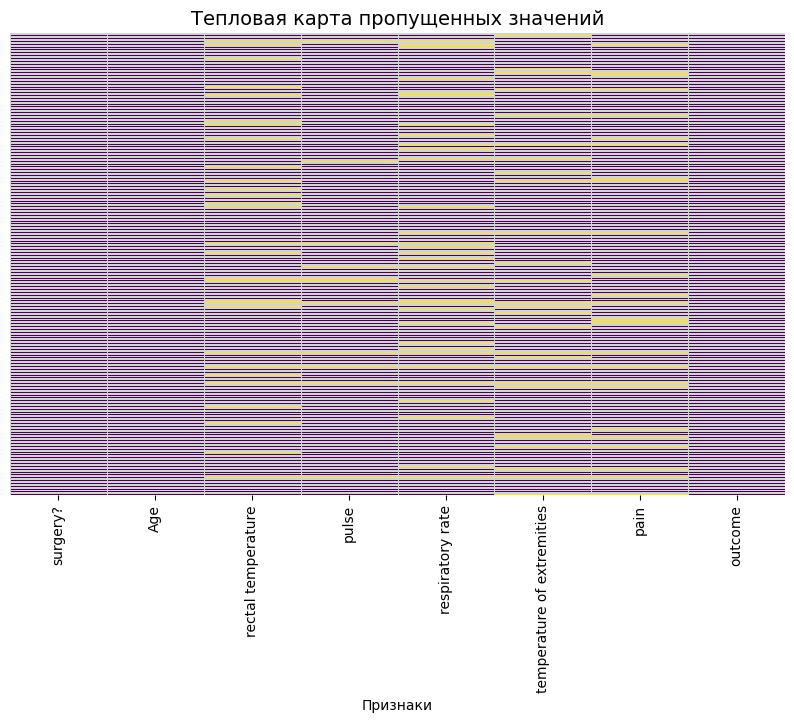

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), 
            cbar=False, 
            cmap='viridis', 
            yticklabels=False, 
            linewidths=0.5, 
            linecolor='lightgray')
plt.title('Тепловая карта пропущенных значений', fontsize=14)
plt.xlabel('Признаки')
plt.show()


# Обработка данных.

## Работа с выбросами.

Определяем выбросы для столбцов с температурой, частотой дыхания и пульсом через IQR. В остальных столбцах выбросов быть не может.

In [5]:
def detect_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.7 * iqr) # коэффициент 1,7 - аналог 3-х σ
    upper_bound = q3 + (1.7 * iqr)
    return (column < lower_bound) | (column > upper_bound)

outliers_rectal_temp = detect_outliers(df2['rectal temperature'])
outliers_pulse = detect_outliers(df2['pulse'])
outliers_respiratory_rate = detect_outliers(df2['respiratory rate'])

# Вывод строк с выбросами
print("Строки с выбросами в столбце 'rectal temperature':")
print(df2[outliers_rectal_temp])
print()
print("\nСтроки с выбросами в столбце 'pulse':")
print(df2[outliers_pulse])
print()
print("Строки с выбросами в столбце 'respiratory rate':")
print(df2[outliers_respiratory_rate])

Строки с выбросами в столбце 'rectal temperature':
     surgery?  Age  rectal temperature  pulse  respiratory rate  \
20        1.0  1.0                39.9   72.0              60.0   
44        1.0  1.0                35.4  140.0              24.0   
54        2.0  1.0                40.3  114.0              36.0   
75        1.0  2.0                39.7  100.0               NaN   
80        1.0  1.0                36.4   98.0              35.0   
91        2.0  1.0                40.3  114.0              36.0   
118       1.0  1.0                36.5   78.0              30.0   
141       2.0  1.0                36.0   42.0              30.0   
238       2.0  1.0                36.1   88.0               NaN   
251       2.0  1.0                36.6   42.0              18.0   
259       1.0  1.0                40.8   72.0              42.0   
281       2.0  1.0                40.0   78.0               NaN   
298       1.0  1.0                36.5  100.0              24.0   

     tempe

После вывода строк с выбросами, мы видим значения температуры (35.4 - 40.8), пульса (160 - 184) и частоты дыхания (66 - 96).

Основываясь на **данных из открытых источнико**в о физиологических показателях лошадей, можно сказать, что почти **все значения реальны** и не являются выбросами. Просто принимают крайние значения.

Таблица “Физиологические нормы лошадей”

|| Взрослые (норма) | Жеребята (норма) | Нижний предел | Верхний предел |
|----------|----------|----------|----------|----------|
| Температура | 37.2 - 38.3 | 37.5 - 38.5 | 36 | 41 |
| Пульс | 20 - 40 | 80 - 120 | 15 | 240 |
| Частота дыхания | 8 - 24 | 20 - 40 | 6 | 100 |

Поэтому вручную зададим границы выбросов. Если какое-то значение выйдет за них, заменим его на ближайшее допустимое.

In [6]:
# Метод .clip(). Все значения, которые меньше или больше, будут заменены.

df2['rectal temperature'] = df2['rectal temperature'].clip(lower=36, upper=41)
df2['pulse'] = df['pulse'].clip(lower=15, upper=240)
df2['respiratory rate'] = df2['respiratory rate'].clip(lower=6, upper=100)

print(df2['rectal temperature'].min(), df2['rectal temperature'].max())
print(df2['pulse'].min(), df2['pulse'].max())
print(df2['respiratory rate'].min(), df2['respiratory rate'].max())
print(df2.shape)

36.0 40.8
30.0 184.0
8.0 96.0
(285, 8)


## Заполнение пропусков (Ручное восстановление по соотношениям).

In [7]:
# Кол-во пропусков в столбцах
print(df2.isna().sum())

surgery?                       1
Age                            0
rectal temperature            45
pulse                          9
respiratory rate              43
temperature of extremities    47
pain                          47
outcome                        1
dtype: int64


Заполнять пропуски средним значением в данном случае некорректно, поскольку большинство признаков распределены ненормально и это может привести к искажению данных. Использование медианы также не решает проблему — такой подход не отражает реальные взаимосвязи между признаками.

Поэтому я выбрал более гибкую стратегию — **поэтапное заполнение пропусков с учётом взаимосвязей между строками и признаками**.

В первую очередь я сосредоточился на ключевых физиологических параметрах: **ректальной температуре, пульсе и частоте дыхания**. Логично предположить, что между ними должна быть сильная корреляция, поскольку все три показателя связаны с общим физиологическим состоянием животного.

Для расчета, я использовал коэффициент корреляции Спирмена, т.к. он не требует нормальности данных.

In [8]:
# Расчет коэффициента корреляции Спирмена

spearman_corr = df2['rectal temperature'].corr(df2['pulse'], method='spearman')
spearman_corr2 = df2['rectal temperature'].corr(df2['respiratory rate'], method='spearman')
spearman_corr3 = df2['pulse'].corr(df2['respiratory rate'], method='spearman')

print(f"Коэффициент корреляции Спирмена между 'rectal temperature' и 'pulse': {spearman_corr}")
print(f"Коэффициент корреляции Спирмена между 'rectal temperature' и 'respiratory rate': {spearman_corr2}")
print(f"Коэффициент корреляции Спирмена между 'respiratory rate' и 'pulse': {spearman_corr3}")

Коэффициент корреляции Спирмена между 'rectal temperature' и 'pulse': 0.23615187291479578
Коэффициент корреляции Спирмена между 'rectal temperature' и 'respiratory rate': 0.23077156863115927
Коэффициент корреляции Спирмена между 'respiratory rate' и 'pulse': 0.4724634525261959


Однако, проведённый анализ показал отсутствие сильной зависимости между этими признаками. Сила корреляции варьируется от -1 до 1.

### Пропуски в ‘pulse’.

Этот столбец будет отправной точкой в заполнении всех пропусков, т.к. имеет мало NaN значений и более высокий коэффициент корреляции (с 'respiratory rate').

Для заполнения пропусков я использую соотношение между пульсом и частотой дыхания. Сначала рассчитаю **средний коэффициент пульс/ЧД** на непустых данных, а затем в строках с пропущенным пульсом буду подставлять приближённое значение: **пульс = частота дыхания × среднее соотношение**.

Чтобы сделать заполнение более точным, я предварительно разобью данные на две группы — **выжившие** и **не выжившие**, так как физиологические показатели в этих группах могут существенно отличаться.

In [9]:
# Рассчитываем новый столбц
df2['pulse to respiration ratio'] = df2['pulse'] / df2['respiratory rate']

# Разделяем DataFrame на две группы в зависимости от 'outcome'
alife = df2[df2['outcome'] == 1]
not_alive = df2[df2['outcome'] != 1]

# Рассчитываем средние значения для всех новых столбцов для каждой группы
avg_pulse_respiration_alive = alife['pulse to respiration ratio'].mean()
avg_pulse_respiration_not_alive = not_alive['pulse to respiration ratio'].mean()


# Выводим результаты
print("Среднее отношение пульса к частоте дыхания для группы outcome = 1:", avg_pulse_respiration_alive)
print("Среднее отношение пульса к частоте дыхания для группы outcome != 1:", avg_pulse_respiration_not_alive)

Среднее отношение пульса к частоте дыхания для группы outcome = 1: 2.6431764960257604
Среднее отношение пульса к частоте дыхания для группы outcome != 1: 2.9799656532346246


In [10]:
# Замена пропусков в 'pulse'

def replace_pulse(row):
    if pd.isna(row['pulse']):
        if row['outcome'] == 1:
                return row['respiratory rate'] * avg_pulse_respiration_alive
        else:
             return row['respiratory rate'] * avg_pulse_respiration_not_alive
    else:
        return row['pulse']
    
# Применяем функцию replace_pulse для замены пропусков в 'pulse'
df2['pulse'] = df2.apply(replace_pulse, axis=1)

print(df2.isna().sum())

surgery?                       1
Age                            0
rectal temperature            45
pulse                          3
respiratory rate              43
temperature of extremities    47
pain                          47
outcome                        1
pulse to respiration ratio    49
dtype: int64


Оставшиеся 3 пропуска заменим на значения моды, т.к. в этих строках отсутствуют значения в столбце 'respiratory rate'.

In [11]:
pulse_mode = df2['pulse'].mode().iloc[0] if not df2['pulse'].mode().empty else np.nan

df2['pulse'] = df2['pulse'].fillna(pulse_mode)

print(df2.isna().sum())

surgery?                       1
Age                            0
rectal temperature            45
pulse                          0
respiratory rate              43
temperature of extremities    47
pain                          47
outcome                        1
pulse to respiration ratio    49
dtype: int64


### Пропуски в ‘respiratory rate’.

Использую тот же метод.

In [12]:
def replace_respiration(row):
    if pd.isna(row['respiratory rate']):
        if row['outcome'] == 1:
            return row['pulse'] / avg_pulse_respiration_alive
        else:
            return row['pulse'] / avg_pulse_respiration_not_alive
    else:
        return row['respiratory rate']

df2['respiratory rate'] = df2.apply(replace_respiration, axis=1)

print(df2.isna().sum())

surgery?                       1
Age                            0
rectal temperature            45
pulse                          0
respiratory rate               0
temperature of extremities    47
pain                          47
outcome                        1
pulse to respiration ratio    49
dtype: int64


### Пропуски в ‘rectal temperature’.

Для замены пропусков тот же способ не подойдет, т.к. у этого столбца очень слабая корреляция с остальными столбцами, что может привести к аномальным значениям, например, температура тела в 16°.

Поскольку распределение данных температуры близко к нормальному, заменим пропуски на значение среднего арифметического для каждой группы.

In [13]:
# Вычисляем среднее арифметическое для групп выжившие и не выжившие

mean_temp_alive = df[df['outcome'] == 1]['rectal temperature'].mean()
mean_temp_not_alive = df[df['outcome'] != 1]['rectal temperature'].mean()

def replace_temperature(row):
    if pd.isna(row['rectal temperature']):
        if row['outcome'] == 1:
            return mean_temp_alive
        else:
            return mean_temp_not_alive
    return row['rectal temperature']

# Применяем функцию replace_temperature для замены пропусков в 'rectal temperature'
df2['rectal temperature'] = df2.apply(replace_temperature, axis=1)

# Выводим результат
print(df2.isna().sum())

surgery?                       1
Age                            0
rectal temperature             0
pulse                          0
respiratory rate               0
temperature of extremities    47
pain                          47
outcome                        1
pulse to respiration ratio    49
dtype: int64


### Пропуски в ‘temperature of extremities’.

Проверю, имеет ли температура конечностей корреляцию с пульсом или с ректальной температурой.

In [14]:
# Расчет коэффициента корреляции Спирмена
spearman_corr4 = df2['temperature of extremities'].corr(df2['pulse'], method='spearman')
spearman_corr5 = df2['temperature of extremities'].corr(df2['rectal temperature'], method='spearman')
spearman_corr5 = df2['temperature of extremities'].corr(df2['rectal temperature'], method='spearman')

print(f"Коэффициент корреляции Спирмена между 'temperature of extremities' и 'pulse': {spearman_corr4}")
print(f"Коэффициент корреляции Спирмена между 'temperature of extremities' и 'rectal temperature': {spearman_corr5}")

Коэффициент корреляции Спирмена между 'temperature of extremities' и 'pulse': 0.35056711140045627
Коэффициент корреляции Спирмена между 'temperature of extremities' и 'rectal temperature': 0.0687371932881639


Для заполнения пропусков в столбце temperature of extremities я применю тот же подход, что и для respiratory rate. Этот признак коррелирует с пульсом лучше, чем rectal temperature .

In [15]:
# Рассчитываем новые столбцы
df2['pulse to temperature of extremities'] = df2['pulse'] / df2['temperature of extremities']

# Рассчитываем средние значения
avg_pulse_extremities = df2['pulse to temperature of extremities'].mean()

print("Среднее отношение пульса к температурt конечностей", avg_pulse_extremities)

Среднее отношение пульса к температурt конечностей 37.89693600736741


In [16]:
# Замена пропусков в 'temperature of extremities'
# Функци возвращает значения от 1 до 4, т.к. это ограничение столбца. 
def replace_extremities(row):
    if pd.isna(row['temperature of extremities']):
        temp_ext = round(row['pulse'] / avg_pulse_extremities)
        if temp_ext > 4:
            return 4
        elif temp_ext < 1:
            return 1
        else:
            return temp_ext
    return row['temperature of extremities']

# Применяем функцию для замены пропусков
df2['temperature of extremities'] = df2.apply(replace_extremities, axis=1)

print(df2.isna().sum())

surgery?                                1
Age                                     0
rectal temperature                      0
pulse                                   0
respiratory rate                        0
temperature of extremities              0
pain                                   47
outcome                                 1
pulse to respiration ratio             49
pulse to temperature of extremities    47
dtype: int64


### Пропуски в ‘pain’

Проверим корреляцию с остальными столбцами.

In [17]:
# Расчет коэффициента корреляции Спирмена
columns_to_compare = ['surgery?', 'Age', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'outcome']

# Создание словаря для хранения коэффициентов корреляции
correlations = {}

# Вычисление коэффициента корреляции Спирмена для каждого столбца с 'pain'
for column in columns_to_compare:
    spearman_corr = df['pain'].corr(df[column], method='spearman')
    correlations[column] = spearman_corr

# Вывод результатов
for column, corr in correlations.items():
    print(f"Коэффициент корреляции Спирмена между 'pain' и '{column}': {corr:.4f}")

Коэффициент корреляции Спирмена между 'pain' и 'surgery?': -0.3138
Коэффициент корреляции Спирмена между 'pain' и 'Age': 0.0347
Коэффициент корреляции Спирмена между 'pain' и 'rectal temperature': -0.0953
Коэффициент корреляции Спирмена между 'pain' и 'pulse': 0.3434
Коэффициент корреляции Спирмена между 'pain' и 'respiratory rate': 0.1940
Коэффициент корреляции Спирмена между 'pain' и 'temperature of extremities': 0.2718
Коэффициент корреляции Спирмена между 'pain' и 'outcome': 0.3413


За основу беру 'pulse', т.к. это самое высокое значение корреляции. 

In [18]:
# Рассчитываем новые столбцы
df2['pulse to pain'] = df2['pulse'] / df2['pain']

# Рассчитываем средние значения
avg_pulse_pain = df2['pulse to pain'].mean()

print("Среднее отношение пульса к боли", avg_pulse_pain)

Среднее отношение пульса к боли 29.491500882322008


In [19]:
# Замена пропусков в 'pain'
# Функци возвращает значения от 1 до 5, т.к. это ограничение столбца.
def replace_pain(row):
    if pd.isna(row['pain']):
        pain_ = round(row['pulse'] / avg_pulse_pain)
        if pain_ > 5:
            return 5
        elif pain_ < 1:
            return 1
        else:
            return pain_
    return row['pain']

# Применяем функцию для замены пропусков
df2['pain'] = df2.apply(replace_pain, axis=1)

print(df2.isna().sum())

surgery?                                1
Age                                     0
rectal temperature                      0
pulse                                   0
respiratory rate                        0
temperature of extremities              0
pain                                    0
outcome                                 1
pulse to respiration ratio             49
pulse to temperature of extremities    47
pulse to pain                          47
dtype: int64


Теперь пропуски остались только в 2-х столбцах одной строки. Имея множество данных в таблице, можно предсказать вероятные значения в 'surgery' и 'outcome'.

In [20]:
# Обнуляем NaN в новых столбцах
df2['pulse to respiration ratio'] = df2['pulse'] / df2['respiratory rate']
df2['pulse to temperature of extremities'] = df2['pulse'] / df2['temperature of extremities']
df2['pulse to pain'] = df2['pulse'] / df2['pain']

# Выводим строку с NaN
rows_with_nan = df2[df2.isna().any(axis=1)]

print(rows_with_nan)

     surgery?  Age  rectal temperature  pulse  respiratory rate  \
132       NaN  1.0                38.0   48.0              20.0   

     temperature of extremities  pain  outcome  pulse to respiration ratio  \
132                         3.0   4.0      NaN                         2.4   

     pulse to temperature of extremities  pulse to pain  
132                                 16.0           12.0  


In [21]:
# Расчет коэффициента корреляции Спирмена
spearman_corr6 = df2['outcome'].corr(df2['surgery?'], method='spearman')

print(f"Коэффициент корреляции Спирмена между 'outcome' и 'surgery?': {spearman_corr6}")

Коэффициент корреляции Спирмена между 'outcome' и 'surgery?': -0.14498254920126963


Корреляция между этими столбцами слабая, поэтому проведем расчеты вероятных значений в этих столбцах не зависимо друг от друга.

Алгоритм расчета:

- Создадим столбцы "веса", перемножив все столбцы, кроме искомых;
- Вычислим средний "вес";
- Делим данные на 2 группы (больше среднего и меньше или равно среднему);
- Рассчитаем средние для каждой группы в столбцах 'surgery?' и 'outcome';
- Заменяем пропуски на среднее значение, в зависимости от "веса".

In [22]:
# Создание столбца "веса"

df2['weight'] = df2['Age'] * df2['rectal temperature'] * df2['pulse'] * df2['respiratory rate'] * df2['temperature of extremities'] * df2['pain']

# Значение среднего "веса"
mean_weight = df2['weight'].mean()

# Создаем две группы данных
group1 = df2[df2['weight'] > mean_weight]
group2 = df2[df2['weight'] <= mean_weight]

# Рассчитываем среднее значение и моду для каждой группы в столбцах 'surgery?' и 'outcome'
mean_surgery_group1 = group1['surgery?'].mean()
mean_surgery_group2 = group2['surgery?'].mean()
mean_outcome_group1 = group1['outcome'].mean()
mean_outcome_group2 = group2['outcome'].mean()

mode_surgery_group1 = group1['surgery?'].mode()[0]
mode_surgery_group2 = group2['surgery?'].mode()[0]
mode_outcome_group1 = group1['outcome'].mode()[0]
mode_outcome_group2 = group2['outcome'].mode()[0]

print("Группа 1 (вес больше среднего значения):")
print("\n")
print(f"Среднее значение 'surgery': {mean_surgery_group1}")
print(f"Мода 'surgery': {mode_surgery_group1}")
print(f"Среднее значение 'outcome': {mean_outcome_group1}")
print(f"Мода 'outcome': {mode_outcome_group1}")
print("\n")

print("Группа 2 (вес меньше или равен среднему значению):")
print("\n")
print(f"Среднее значение 'surgery': {mean_surgery_group2}")
print(f"Мода 'surgery': {mode_surgery_group2}")
print(f"Среднее значение 'outcome': {mean_outcome_group2}")
print(f"Мода 'outcome': {mode_outcome_group2}")

Группа 1 (вес больше среднего значения):


Среднее значение 'surgery': 1.3012048192771084
Мода 'surgery': 1.0
Среднее значение 'outcome': 1.8313253012048192
Мода 'outcome': 2.0


Группа 2 (вес меньше или равен среднему значению):


Среднее значение 'surgery': 1.4427860696517414
Мода 'surgery': 1.0
Среднее значение 'outcome': 1.4427860696517414
Мода 'outcome': 1.0


In [23]:
# Замена пропусков в 'surgery' и 'outcome'

def replace_surgery_outcome(row):
    if row['weight'] > mean_weight:
        if pd.isnull(row['surgery?']):
            row['surgery?'] = mode_surgery_group1
        if pd.isnull(row['outcome']):
            row['outcome'] = mode_outcome_group1
    else:
        if pd.isnull(row['surgery?']):
            row['surgery?'] = mode_surgery_group2
        if pd.isnull(row['outcome']):
            row['outcome'] = mode_outcome_group2
    return row

# Применение функции к DataFrame
df2 = df2.apply(replace_surgery_outcome, axis=1)

# Выводим результат
print(df2.isna().sum())

surgery?                               0
Age                                    0
rectal temperature                     0
pulse                                  0
respiratory rate                       0
temperature of extremities             0
pain                                   0
outcome                                0
pulse to respiration ratio             0
pulse to temperature of extremities    0
pulse to pain                          0
weight                                 0
dtype: int64


# Итоги

После заполнения пропусков сравним основные статистики новой и старой таблиц, а также их диаграммы.

In [24]:
# Обозначаем интересующие нас столбцы
columns_of_interest = [
    'surgery?', 'Age', 'rectal temperature', 'pulse', 
    'respiratory rate', 'temperature of extremities', 
    'pain', 'outcome'
]

# Функция для вычисления статистических показателей
def calculate_statistics(df, columns):
    stats = {}
    for column in columns:
        stats[column] = {
            'min': round(df[column].min(), 2),
            'max': round(df[column].max(), 2),
            'range': round(df[column].max() - df[column].min(), 2),
            'mean': round(df[column].mean(), 2),
            'median': round(df[column].median(), 2),
            'mode': round(df[column].mode()[0], 2) if not df[column].mode().empty else np.nan
        }
    return pd.DataFrame(stats)

# Вычисляем статистику для обоих DataFrame
stats_df1 = calculate_statistics(df, columns_of_interest)
stats_df2 = calculate_statistics(df2, columns_of_interest)

# Вывод статистики для сравнения
print("Статистика для исходных данных:")
print(stats_df1)
print("\nСтатистика для таблицы с заполнеными пропусками:")
print(stats_df2)

Статистика для исходных данных:
        surgery?   Age  rectal temperature   pulse  respiratory rate  \
min          1.0  1.00               35.40   30.00              8.00   
max          2.0  2.00               40.80  184.00             96.00   
range        1.0  1.00                5.40  154.00             88.00   
mean         1.4  1.08               38.17   71.91             30.42   
median       1.0  1.00               38.20   64.00             24.50   
mode         1.0  1.00               38.00   48.00             20.00   

        temperature of extremities  pain  outcome  
min                           1.00  1.00     1.00  
max                           4.00  5.00     3.00  
range                         3.00  4.00     2.00  
mean                          2.35  2.95     1.55  
median                        3.00  3.00     1.00  
mode                          3.00  3.00     1.00  

Статистика для таблицы с заполнеными пропусками:
        surgery?   Age  rectal temperature   puls

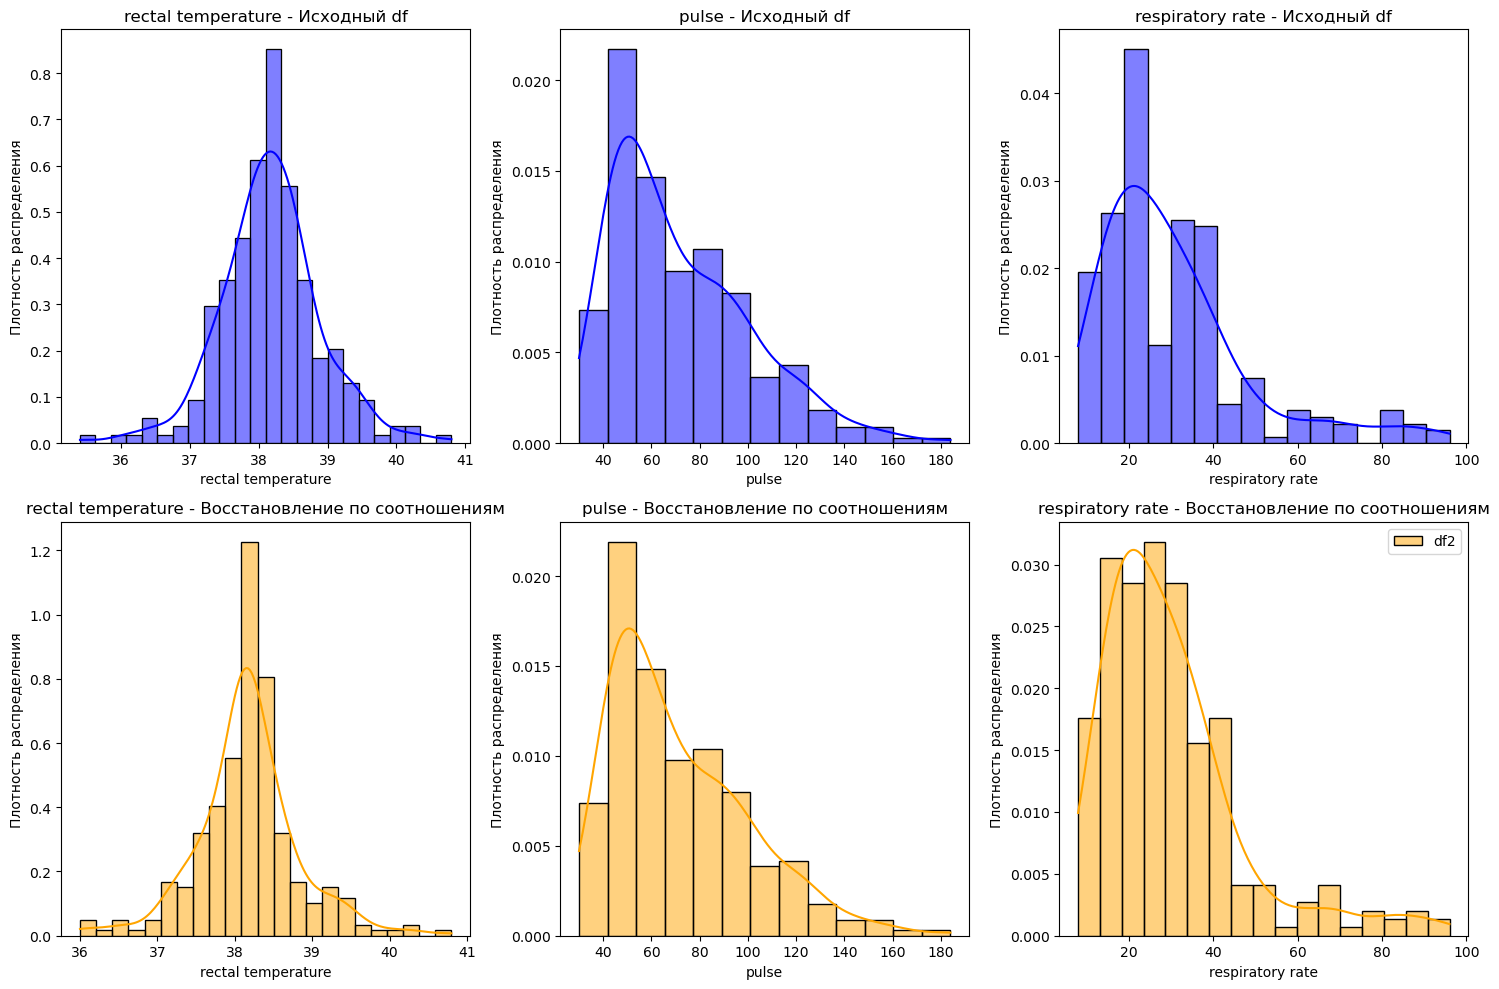

In [25]:

# Список интересующих столбцов
columns = ['rectal temperature', 'pulse', 'respiratory rate']

# Настройка размера графиков
plt.figure(figsize=(15, 10))

# Перебираем все столбцы и строим диаграммы распределения
for i, col in enumerate(columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True, color='blue', label='df', stat='density')
    plt.title(f'{col} - Исходный df')
    plt.xlabel(col)
    plt.ylabel('Плотность распределения')

    plt.subplot(2, 3, i + 4)
    sns.histplot(df2[col].dropna(), kde=True, color='orange', label='df2', stat='density')
    plt.title(f'{col} - Восстановление по соотношениям')
    plt.xlabel(col)
    plt.ylabel('Плотность распределения')

# Настройка отображения легенды и компоновки графиков
plt.tight_layout()
plt.legend()
plt.show()

Как видно на графиках, форма распределения практически не изменилась. Метод восстановления по соотношениям показал результаты лучше, чем если бы все пропуски были просто заполнены средними.

Однако у этого меда есть слабое место - слабая корреляция признаков. 

### Заполнение пропусков (KNN Imputer).

**Шаги, которые выполняет KNN Imputer:**

1. Ищет строки без пропуска в данном столбце.
2. Для строки с пропуском:
    - Сравнивает её с другими строками по доступным (непропущенным) признакам.
    - Использует евклидово расстояние (по умолчанию) для нахождения `k` ближайших строк (соседей).
3. Восстанавливает пропущенное значение:
    - Берёт значения этого признака у найденных соседей.
    - Вычисляет среднее значение и подставляет его.

**Преимущества метода:**

- Использует всю структуру данных — не просто среднее по столбцу.
- Адаптируется к локальным закономерностям.
- Работает с несколькими признаками одновременно.

In [26]:
from sklearn.impute import KNNImputer
df3 = df.copy()

# Выделяем только числовые столбцы
numeric_cols = df3.select_dtypes(include='number').columns

# Копируем только числовую часть
df_knn = df3[numeric_cols].copy()

# Инициализируем KNN импутер
knn_imputer = KNNImputer(n_neighbors=5)

# Применяем импутацию
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=numeric_cols)

# Обновляем исходный df3 с заполненными значениями
df3[numeric_cols] = df_knn_imputed

print("Пропуски заполнены методом KNNImputer")
print(df3.isna().sum())


Пропуски заполнены методом KNNImputer
surgery?                      0
Age                           0
rectal temperature            0
pulse                         0
respiratory rate              0
temperature of extremities    0
pain                          0
outcome                       0
dtype: int64


Проверим, не вышли ли новые значения за пределы допустимых.

In [27]:
# Словарь: допустимые границы для каждого столбца
boundaries = {
    'rectal temperature': (36, 41),
    'pulse': (15, 240),
    'respiratory rate': (6, 100),
    'temperature of extremities': (1, 4),  
    'pain': (1, 5),                        
    'surgery?': (1, 2),
    'Age': (1, 2),
    'outcome': (1, 3)
}

# Проверка выхода за границы
for column, (lower, upper) in boundaries.items():
    if column in df3.columns:
        below = (df3[column] < lower).sum()
        above = (df3[column] > upper).sum()
        if below > 0 or above > 0:
            print(f" Столбец '{column}': {below} значений ниже {lower}, {above} выше {upper}")
        else:
            print(f" Столбец '{column}' — все значения в пределах [{lower}, {upper}]")

 Столбец 'rectal temperature': 1 значений ниже 36, 0 выше 41
 Столбец 'pulse' — все значения в пределах [15, 240]
 Столбец 'respiratory rate' — все значения в пределах [6, 100]
 Столбец 'temperature of extremities' — все значения в пределах [1, 4]
 Столбец 'pain' — все значения в пределах [1, 5]
 Столбец 'surgery?' — все значения в пределах [1, 2]
 Столбец 'Age' — все значения в пределах [1, 2]
 Столбец 'outcome' — все значения в пределах [1, 3]


In [28]:
# Заменяем все значения ниже 36 на 36
df3.loc[df3['rectal temperature'] < 36, 'rectal temperature'] = 36

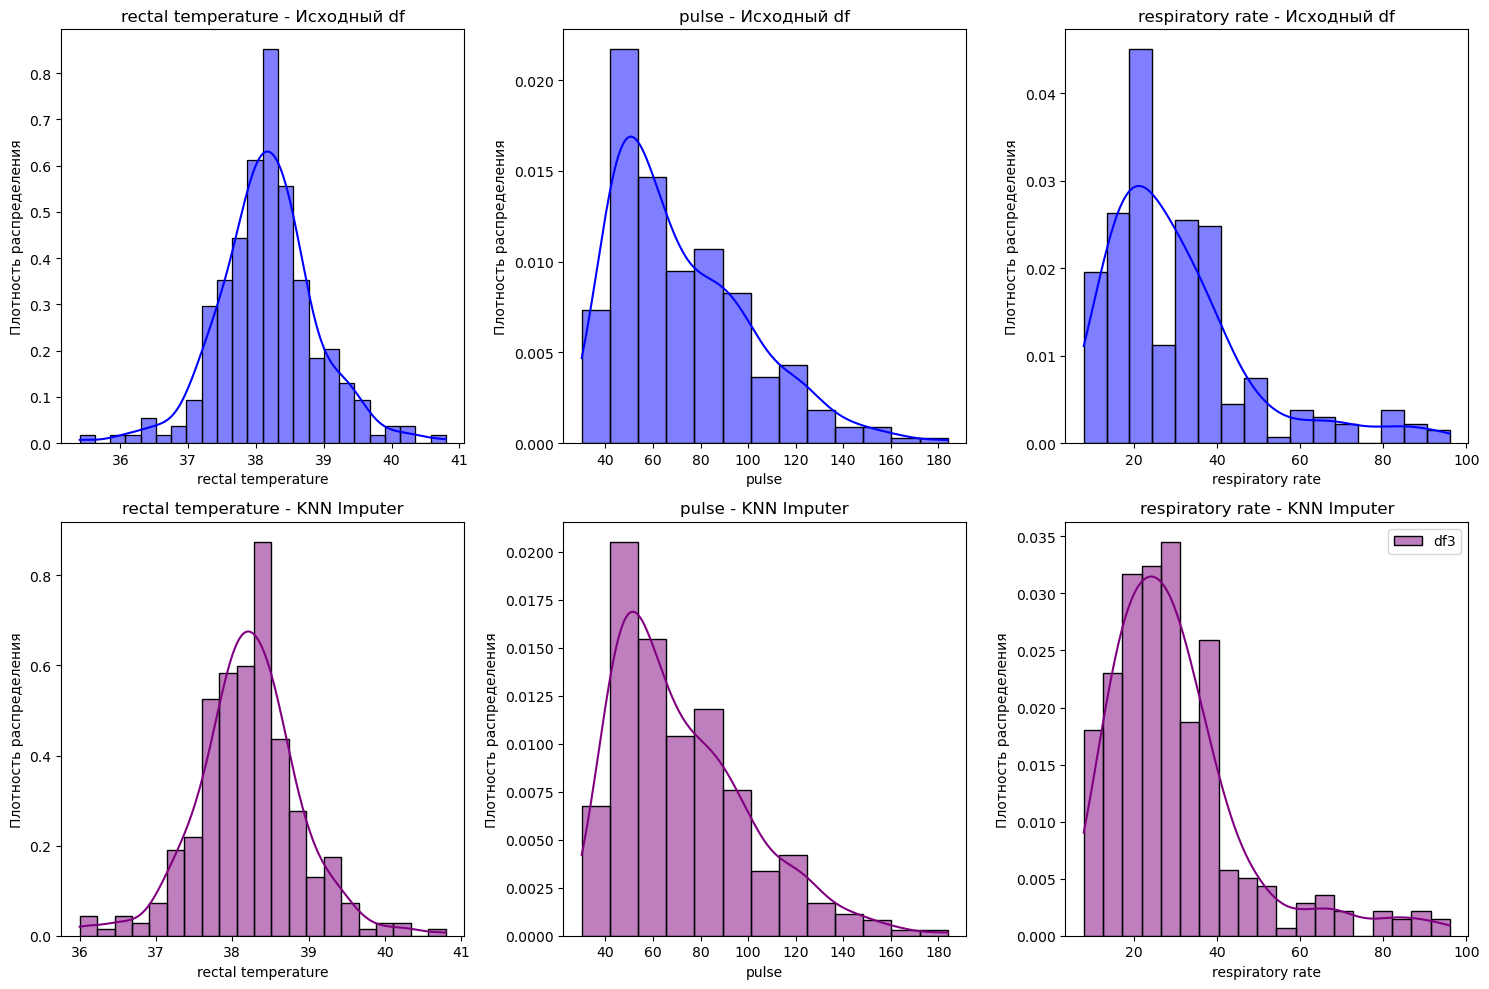

In [29]:
# Список интересующих столбцов
columns = ['rectal temperature', 'pulse', 'respiratory rate']

# Настройка размера графиков
plt.figure(figsize=(15, 10))

# Перебираем все столбцы и строим диаграммы распределения
for i, col in enumerate(columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True, color='blue', label='df', stat='density')
    plt.title(f'{col} - Исходный df')
    plt.xlabel(col)
    plt.ylabel('Плотность распределения')

    plt.subplot(2, 3, i + 4)
    sns.histplot(df3[col].dropna(), kde=True, color='purple', label='df3', stat='density')
    plt.title(f'{col} - KNN Imputer')
    plt.xlabel(col)
    plt.ylabel('Плотность распределения')

# Настройка отображения легенды и компоновки графиков
plt.tight_layout()
plt.legend()
plt.show()

KNN Imputer распределения немного отличаются от предыдущего метода. Однако также похожи на изначальные. 

### Заполнение пропусков (Iterative Imputer (с RandomForest)).

**Шаги, которые выполняет IterativeImputer:**

1. Начинает с предварительного заполнения всех NaN (например, медианой).
2. Затем по очереди берёт каждый признак, в котором есть пропуски:
    - Строит модель, например, `RandomForest`, чтобы предсказать этот признак на основе всех других.
    - Использует эту модель, чтобы перепредсказать пропущенные значения.
3. Повторяет процесс по всем признакам, несколько раз.
4. Итог — значения, последовательно уточнённые за несколько итераций.

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Копия исходного DataFrame
df4 = df.copy()

# Определяем числовые столбцы
numeric_cols = df4.select_dtypes(include='number').columns

# Создаём итеративный импутер с начальной стратегией "медиана"
iter_imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=10, random_state=0),
    max_iter=40,
    tol=1e-2,
    initial_strategy='median', 
    random_state=0
)

# Применяем импутацию к числовым признакам
df4[numeric_cols] = iter_imputer.fit_transform(df4[numeric_cols])

# Проверка
print("Пропуски заполнены методом IterativeImputer (RandomForest)")
print(df4.isna().sum())


Пропуски заполнены методом IterativeImputer (RandomForest)
surgery?                      0
Age                           0
rectal temperature            0
pulse                         0
respiratory rate              0
temperature of extremities    0
pain                          0
outcome                       0
dtype: int64


E:\Programm\Co\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [31]:
# Словарь: допустимые границы для каждого столбца
boundaries = {
    'rectal temperature': (36, 41),
    'pulse': (15, 240),
    'respiratory rate': (6, 100),
    'temperature of extremities': (1, 4),  
    'pain': (1, 5),                        
    'surgery?': (1, 2),
    'Age': (1, 2),
    'outcome': (1, 3)
}

# Проверка выхода за границы
for column, (lower, upper) in boundaries.items():
    if column in df4.columns:
        below = (df4[column] < lower).sum()
        above = (df4[column] > upper).sum()
        if below > 0 or above > 0:
            print(f" Столбец '{column}': {below} значений ниже {lower}, {above} выше {upper}")
        else:
            print(f" Столбец '{column}' — все значения в пределах [{lower}, {upper}]")

 Столбец 'rectal temperature': 1 значений ниже 36, 0 выше 41
 Столбец 'pulse' — все значения в пределах [15, 240]
 Столбец 'respiratory rate' — все значения в пределах [6, 100]
 Столбец 'temperature of extremities' — все значения в пределах [1, 4]
 Столбец 'pain' — все значения в пределах [1, 5]
 Столбец 'surgery?' — все значения в пределах [1, 2]
 Столбец 'Age' — все значения в пределах [1, 2]
 Столбец 'outcome' — все значения в пределах [1, 3]


In [32]:
# Заменяем все значения ниже 36 на 36
df4.loc[df['rectal temperature'] < 36, 'rectal temperature'] = 36

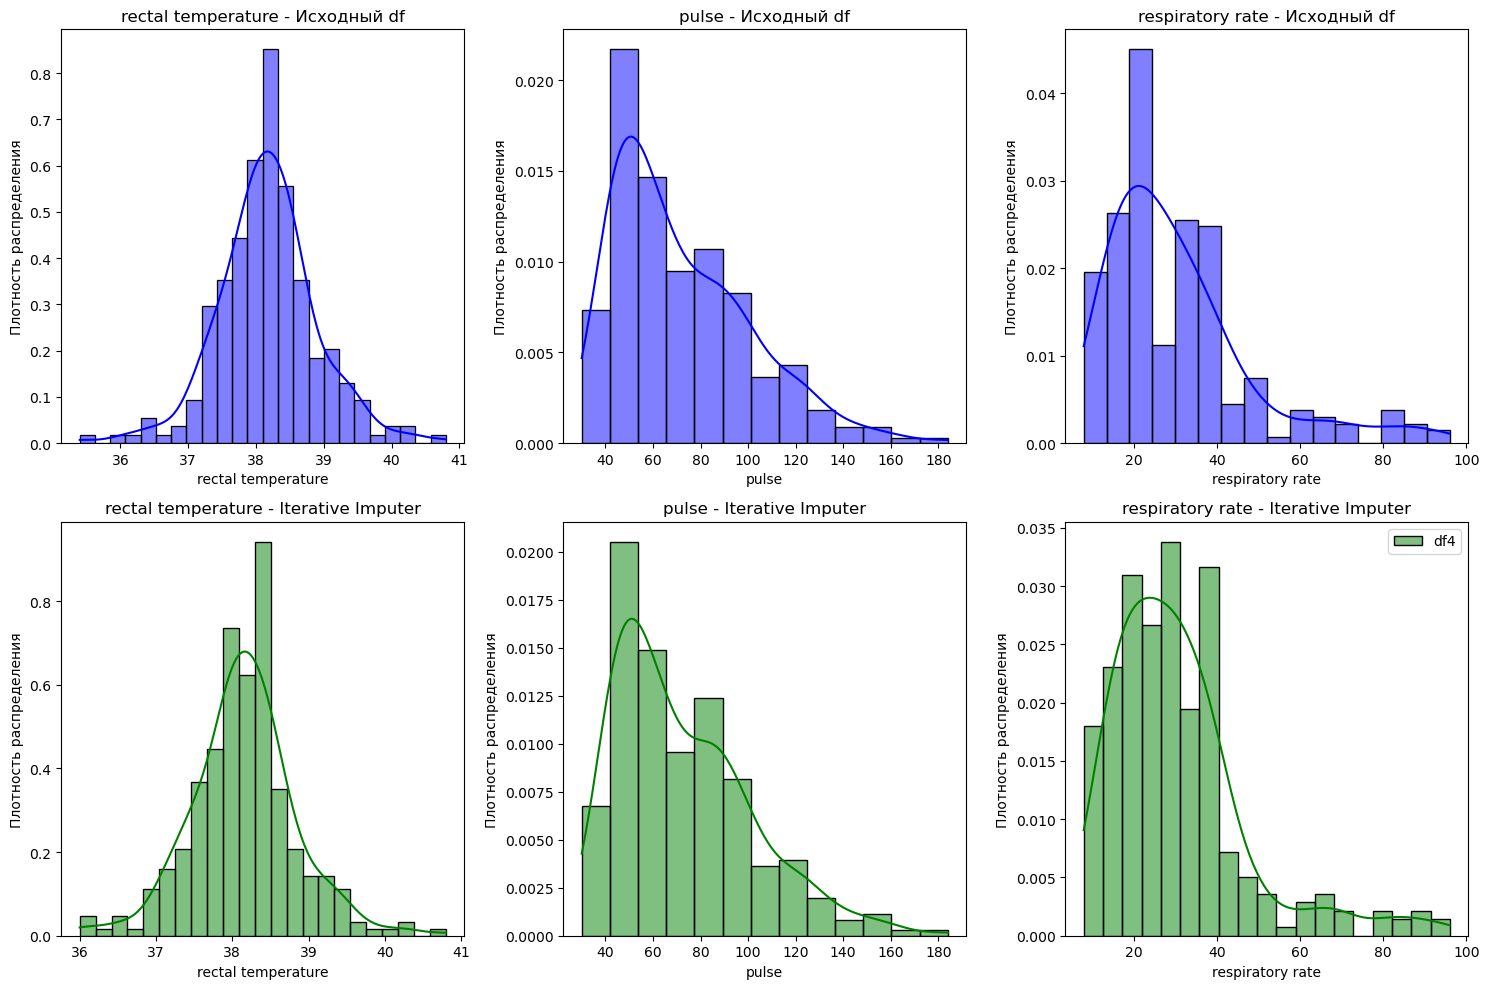

In [33]:
# Список интересующих столбцов
columns = ['rectal temperature', 'pulse', 'respiratory rate']

# Настройка размера графиков
plt.figure(figsize=(15, 10))

# Перебираем все столбцы и строим диаграммы распределения
for i, col in enumerate(columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True, color='blue', label='df', stat='density')
    plt.title(f'{col} - Исходный df')
    plt.xlabel(col)
    plt.ylabel('Плотность распределения')

    plt.subplot(2, 3, i + 4)
    sns.histplot(df4[col].dropna(), kde=True, color='green', label='df4', stat='density')
    plt.title(f'{col} - Iterative Imputer')
    plt.xlabel(col)
    plt.ylabel('Плотность распределения')

# Настройка отображения легенды и компоновки графиков
plt.tight_layout()
plt.legend()
plt.show()

 Распределения признаков сохранили форму и не исказились. На мой взгляд этот метод сработал “мягче” остальных.

# Вывод

В ходе работы была произведена очистка и заполнены пропуски медицинских данных, связанных с состоянием лошадей.  В работе также были использованы данные исследований из открытых источников о физиологическом состоянии лошадей.
Для заполнения пропусков были опробованы несколько подходов:

- собственный метод на основе физиологических соотношений (корреляций между рядами);
- классический KNN Imputer;
- более продвинутый метод Iterative Imputer с использованием модели случайного леса.

Если наложить графики друг на друга, мы увидим, что все 3 метода сработали хорошо и похожим образом.

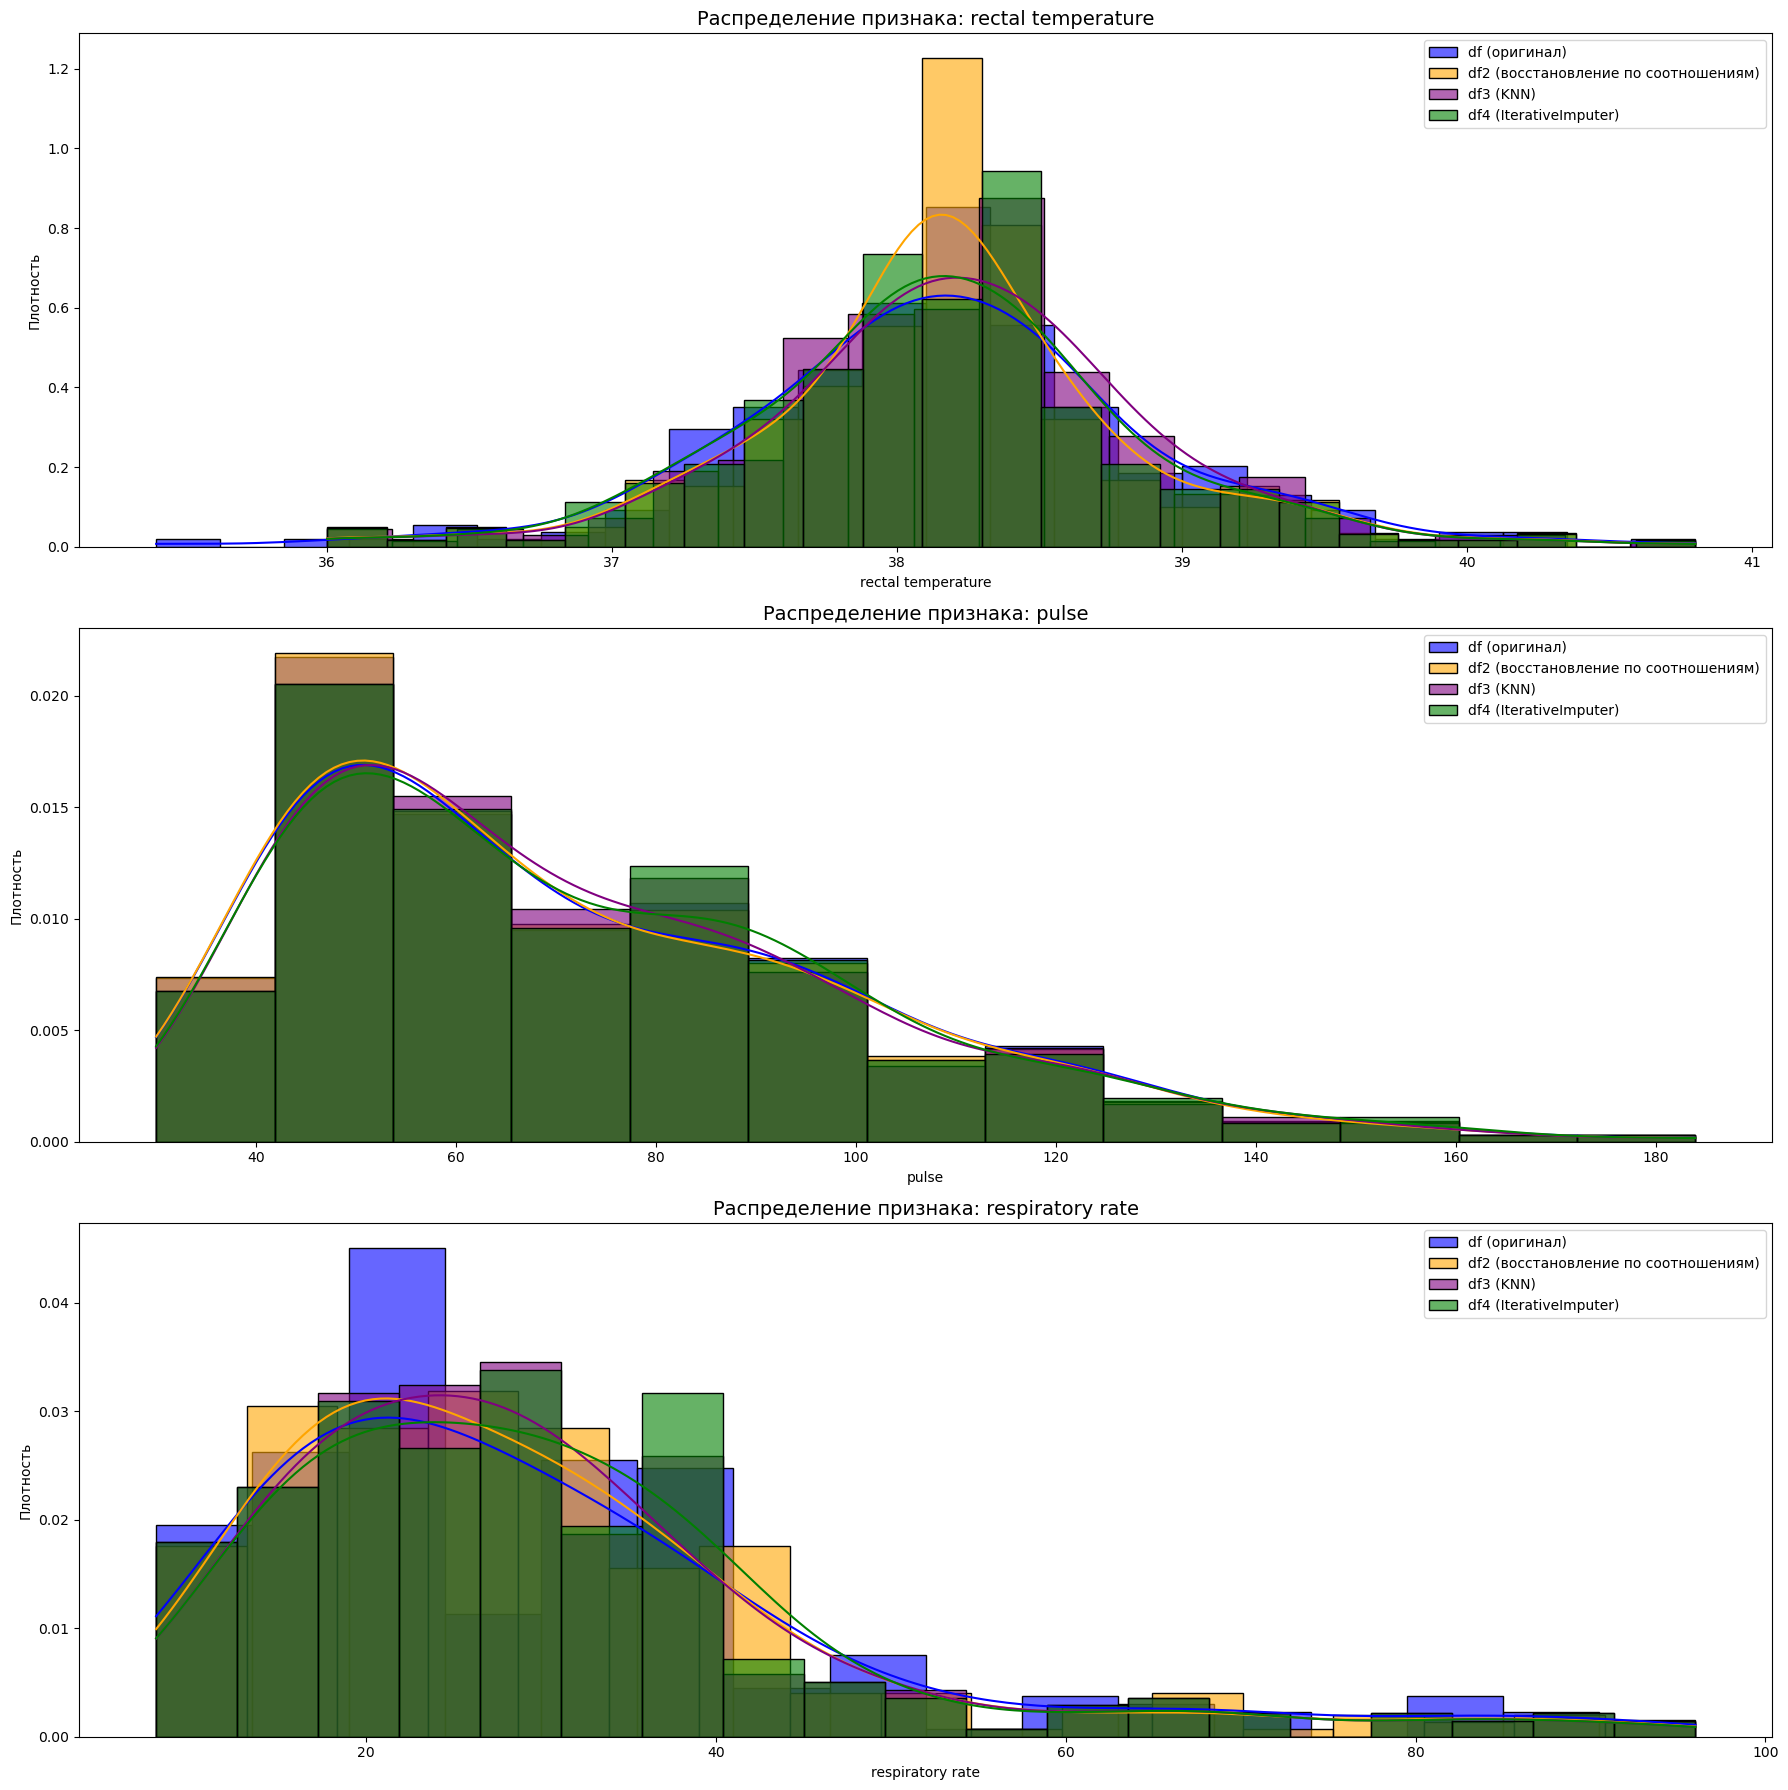

In [34]:

# Список интересующих столбцов
columns = ['rectal temperature', 'pulse', 'respiratory rate']

# Настройка размера графиков: по одному графику на каждый признак
plt.figure(figsize=(18, 6 * len(columns)))

# Проход по каждому столбцу
for i, col in enumerate(columns):
    plt.subplot(len(columns), 1, i + 1)
    
    # Строим распределения из всех версий DataFrame
    sns.histplot(df[col].dropna(), kde=True, stat='density', label='df (оригинал)', color='blue', alpha=0.6)
    sns.histplot(df2[col].dropna(), kde=True, stat='density', label='df2 (восстановление по соотношениям)', color='orange', alpha=0.6)
    sns.histplot(df3[col].dropna(), kde=True, stat='density', label='df3 (KNN)', color='purple', alpha=0.6)
    sns.histplot(df4[col].dropna(), kde=True, stat='density', label='df4 (IterativeImputer)', color='green', alpha=0.6)
    
    # Оформление
    plt.title(f'Распределение признака: {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Плотность')
    plt.legend()

# Компактное отображение
plt.tight_layout()
plt.show()


Однако я остановлю свой выбор на **Iterative Imputer** методе.

Этот метод оказался наиболее надёжным, потому что:

- он поочерёдно обучает модель для каждого признака с пропущенными значениями, используя остальные как предикторы;
- в качестве модели использован Random Forest, способный улавливать нелинейные и сложные зависимости;
- метод работает итеративно, улучшая предсказания на каждом шаге;
- он менее чувствителен к распределению данных, чем метод на основе средних или линейных отношений.